In [40]:
import re
from Bio import Entrez 
from Bio import SeqIO 

import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
IDs =['AB007187', 'M17887', 'AB007166', 'U65581', 'AB007167', 'U14966', 'X69391', 'L16557', 
      'BC005128', 'Z28407', 'D14531', 'AB007170', 'U12404', 'AB063608']

In [37]:
h=[]
Entrez.email = "juleth.flores@est.ikiam.edu.ec" 
ofile=open('Data/SequenceLRibosomal.gb','w')
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= IDs) as handley: 
    for seq_record in SeqIO.parse(handley, "gb"): 
        ofile.write(">"+str(seq_record.id)+str(seq_record.description[:50])+'\n')
        ofile.write(str(seq_record.seq)+'\n')
        ofile.write('\n')
        h.append (len(seq_record.seq))

In [38]:
h

[670, 460, 745, 1548, 185, 987, 926, 1841, 892, 852, 689, 379, 700, 756]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


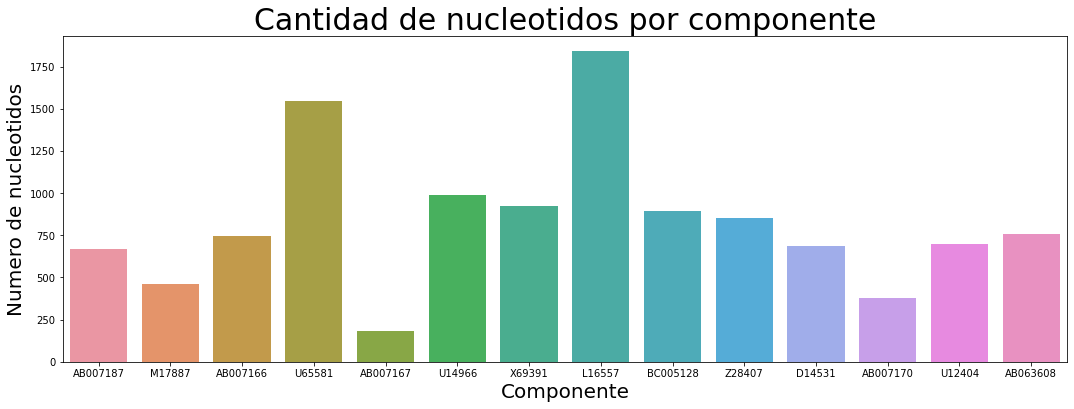

In [41]:
#Codigo para el histograma

f=IDs #Nombre de los componentes
h=h #Cantidad de nucleòtidos
fig = plt.figure(1, figsize=(18, 6))
plt.title('Cantidad de nucleotidos por componente',fontsize = 30)
plt.xlabel('Componente', fontsize = 20, rotation = 0)
plt.ylabel('Numero de nucleotidos', fontsize = 20, rotation = 90)
sns.barplot(f, h)
plt.show()

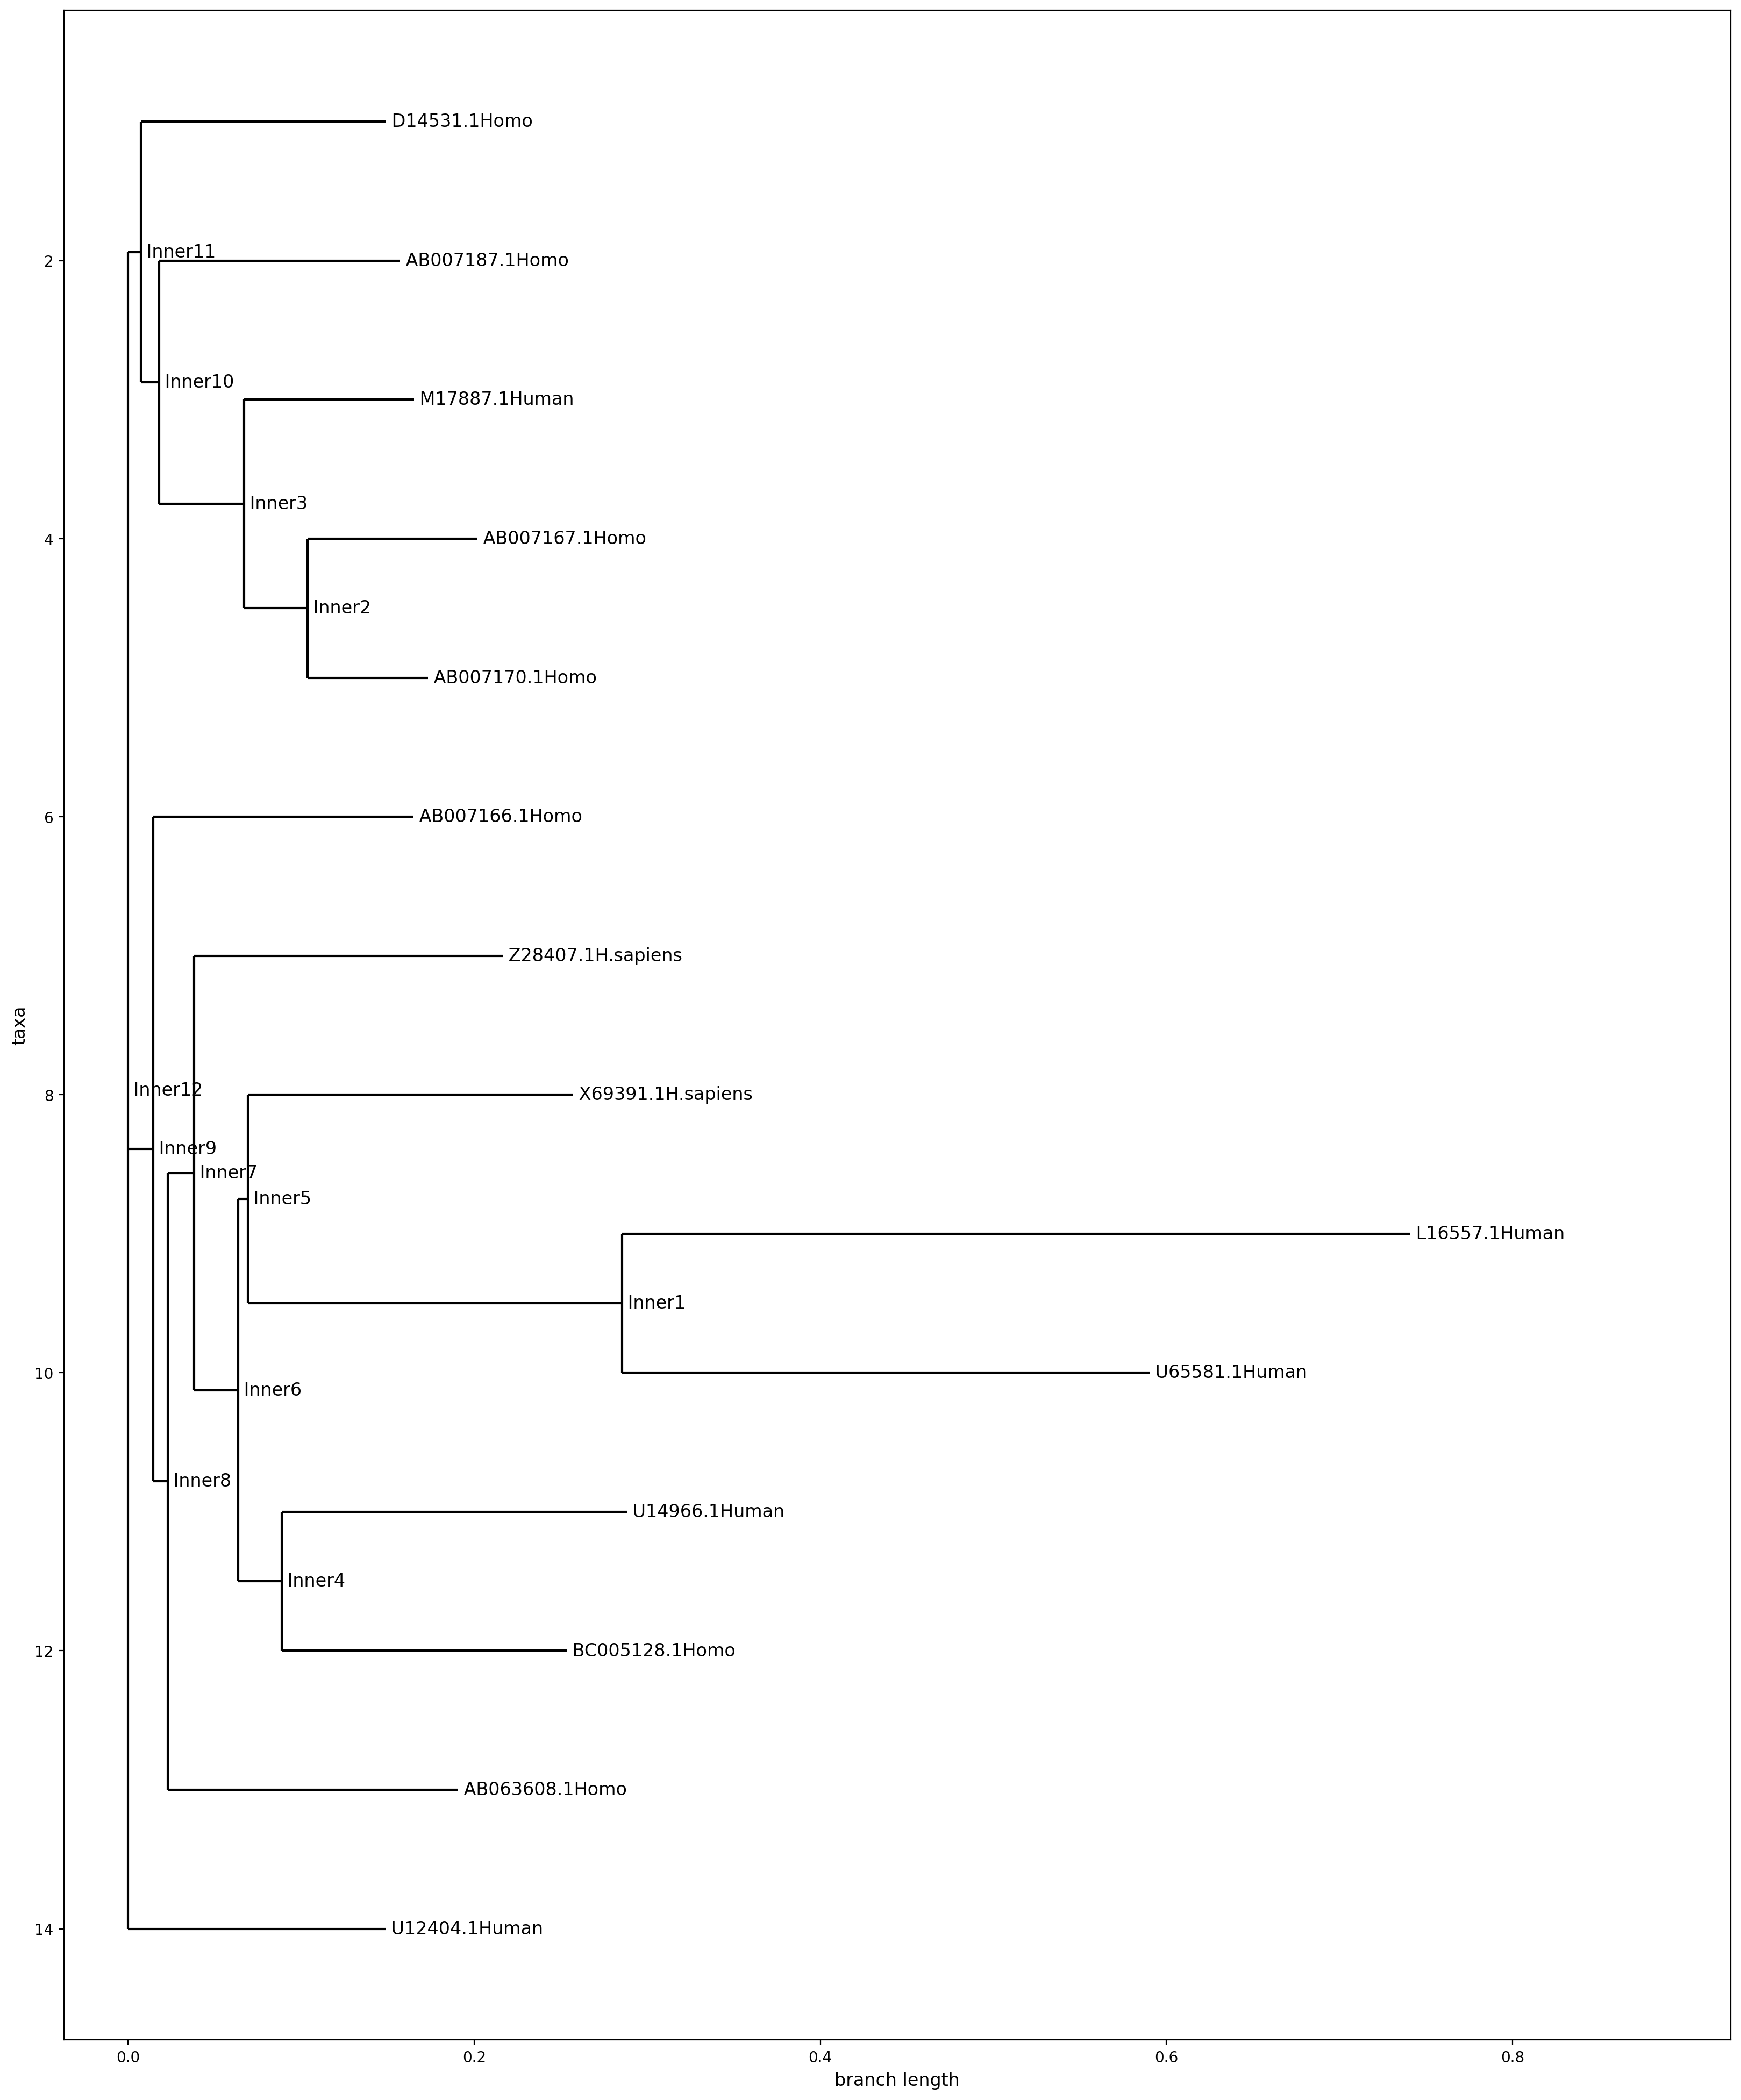

In [49]:
#Codigo para el arbol filogenetico 

from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator 
from Bio.Align.Applications import ClustalwCommandline
from Bio import AlignIO
from Bio import Phylo
from Bio import Entrez
from Bio import SeqIO
import Bio
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

ffile=open('Data/Sequence.fasta','w')
with open("Data/SequenceLRibosomal.gb",'r') as genbank:
    c=genbank.read()
    for lin in c:
        ffile.write(str(lin))

clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "Data/Sequence.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout,stderr = clustalw_cline()

ClustalAlign = AlignIO.read("Data/Sequence.aln", "clustal")

calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(ClustalAlign)

constructor = DistanceTreeConstructor(calculator)
Data_tree = constructor.build_tree(ClustalAlign)
Data_tree.rooted = True

Phylo.write(Data_tree, "Data/Data_tree.xml", "phyloxml")

fig = plt.figure(figsize=(20, 25), dpi=200)  
matplotlib.rc('font', size=12)               
matplotlib.rc('xtick', labelsize=10)       
matplotlib.rc('ytick', labelsize=10)       
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(Data_tree, axes=axes)
